In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from wordcloud import WordCloud
from tqdm import tqdm
#from geopy.geocoders import Nominatim
#from folium.plugins import HeatMap
#import folium
#from tqdm import tqdm
import re
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
#from sklearn.model_selection import train_test_split
#from nltk import word_tokenize
#from sklearn.feature_extraction.text import TfidfVectorizer
#import gensim
#from collections import Counter
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#import matplotlib.colors as mcolors
#from sklearn.manifold import TSNE
#from gensim.models import word2vec
#import nltk


In [28]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import os
cwd = os.getcwd()
print(os.listdir(cwd))

['Music', '.condarc', 'ZomatoDataWrangling.ipynb', 'Untitled1.ipynb', '.DS_Store', '.CFUserTextEncoding', 'Untitled.ipynb', 'Pictures', 'Untitled2.ipynb', '.ipython', 'zomato.csv', 'Desktop', 'Library', '.matplotlib', 'ZomatoAPI-Copy1.ipynb', '.android', '.bash_sessions', 'Public', '.anaconda', 'Movies', 'opt', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.bash_profile', 'Downloads', '.bash_history', '.conda']


In [29]:
df=pd.read_csv("zomato.csv")
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [30]:
#Extract reviews and ratings into a DF
all_ratings = []
for name,location,ratings in tqdm(zip(df['name'],df['location'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in (ratings):
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,location,score, doc])
rating_df=pd.DataFrame(all_ratings,columns=['name','location','rating','review'])
print(rating_df[rating_df['name']=='Jalsa'].tail())

51717it [00:20, 2497.02it/s]


          name      location  rating  \
1022164  Jalsa  Marathahalli     5.0   
1022165  Jalsa  Marathahalli     4.0   
1022166  Jalsa  Marathahalli     4.0   
1022167  Jalsa  Marathahalli     4.0   
1022168  Jalsa  Marathahalli     5.0   

                                                    review  
1022164  Yummy and lip smacking chicken platter :-)\nTh...  
1022165  We went for a late dinner at Jalsa, place was ...  
1022166  Been here on a Sunday afternoon with my folks....  
1022167  This is one of the first place which I have co...  
1022168  Nice place for lunch ÃÃÃÃÃÃÃÃÂ°...  


In [31]:
#Taking a closer look at the last review:
print(rating_df.loc[1022168]['review'])

Nice place for lunch ÃÃÃÃÃÃÃÃÂ°ÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÂ´ with office team. The ambiance was really good. ItÃÃÃÃÃÃÃÃÂ¢ÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃs a well balanced combination of royals ÃÃÃÃÃÃÃÃÂ°ÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃ and feeling like we dine in our own kingdom.

Food was good.
Service was pretty nice. Overall experience was good.


subirmajumder85.wixsite.com


In [32]:
#We notice junk characters above, removing anything that is not a letter or a number:
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))
print(rating_df.loc[1022168]['review'])
#retains dots and special characters?

Nice place for lunch  with office team The ambiance was really good Its a well balanced combination of royals  and feeling like we dine in our own kingdom

Food was good
Service was pretty nice Overall experience was good


subirmajumder85wixsitecom


In [33]:
print(rating_df[rating_df['name']=='Jalsa'].index.values)

[      0       1       2       3       4       5       6       7       8
       9      10      11    9027    9028    9029    9030    9031    9032
    9033    9034    9035    9036    9037   10866   10867   10868   10869
   10870   10871   10872   10873   10874   10875   10876   46108   46109
   46110   46111   46112   46113   46114   46115   46116   46117   55999
   56000   56001   56002   56003   56004   56005   56006   56007   56008
   62938   62939   62940   62941   62942   62943   62944   62945   62946
   62947  157372  157373  157374  157375  157376  157377  157378  157379
  157380  157381  157382  157383  157384  157385  157386  157387  157388
  157389  157390  157391  157392  157393  157394  157395  157396  157397
  157398  157399  157400  157401  157402  157403  157404  157405  157406
  157407  157408  157409  157410  157411  157412  157413  157414  157415
  157416  157417  157418  157419  157420  427965  427966  427967  427968
  427969  427970  427971  427972  457500  457501  4

In [34]:
#Checking original dataset
print(df[df['name']=='Jalsa'][['location','address']])

           location                                            address
0      Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
456    Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
559    Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
2488   Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
2966   Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
3462   Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
7607   Marathahalli  25/7, Doddannakundi, Outer Ring Road, Mahadeva...
19401  Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
20399  Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
21302  Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...
41364  Marathahalli  25/7, Doddannakundi, Outer Ring Road, Mahadeva...


In [35]:
print(df.loc[0]['url'])
print(df.loc[456]['url'])

https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19
https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbIjE4ODkwOTQwIiwiMTg4ODYyNzgiLCIxODg4NzM5MCIsIjE4OTAwNDI2Iiw1ODY5NCwiNTE4MTUiLCIxODcyOTM5MiIsIjE4OTQ2MjE0IiwiMTg3MTYwNjEiLCIxODYxNDQ3NiIsIjE4NzkzMDEwIiwiMTg5MjI5MTMiLCI1NjU5MCIsIjYwMjI0IiwiMTg2MzgzMzAiLCIxODg3NDI5MiIsIjE4NjM1MTMzIiwiNTQ4MDgiLCIxODUxMTYzNSIsIjE4Njk0OTU0IiwiMTg4ODE3NjYiLCIxODQzOTY3MCIsIjU5MDkwIiwiNTk4NTAiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJhbmFzaGFua2FyaSJ9fQ==


In [36]:
#Tagging the restaurants together by name and location :
rating_df['Tag']=rating_df['name']+'-'+rating_df['location']
print(rating_df.head())

    name      location  rating  \
0  Jalsa  Banashankari     4.0   
1  Jalsa  Banashankari     4.0   
2  Jalsa  Banashankari     2.0   
3  Jalsa  Banashankari     4.0   
4  Jalsa  Banashankari     5.0   

                                              review                 Tag  
0  A beautiful place to dine inThe interiors take...  Jalsa-Banashankari  
1  I was here for dinner with my family on a week...  Jalsa-Banashankari  
2  Its a restaurant near to Banashankari BDA Me a...  Jalsa-Banashankari  
3  We went here on a weekend and one of us had th...  Jalsa-Banashankari  
4  The best thing about the place is its ambiance...  Jalsa-Banashankari  


In [37]:
rating_df.drop(['name','location'],axis=1, inplace=True)
print(rating_df[rating_df['Tag'].str.startswith('Jalsa-', na=False)])

         rating                                             review  \
0           4.0  A beautiful place to dine inThe interiors take...   
1           4.0  I was here for dinner with my family on a week...   
2           2.0  Its a restaurant near to Banashankari BDA Me a...   
3           4.0  We went here on a weekend and one of us had th...   
4           5.0  The best thing about the place is its ambiance...   
...         ...                                                ...   
1022164     5.0  Yummy and lip smacking chicken platter \nTheir...   
1022165     4.0  We went for a late dinner at Jalsa place was l...   
1022166     4.0  Been here on a Sunday afternoon with my folks ...   
1022167     4.0  This is one of the first place which I have co...   
1022168     5.0  Nice place for lunch  with office team The amb...   

                        Tag  
0        Jalsa-Banashankari  
1        Jalsa-Banashankari  
2        Jalsa-Banashankari  
3        Jalsa-Banashankari  
4        

Text(0, 0.5, 'Count')

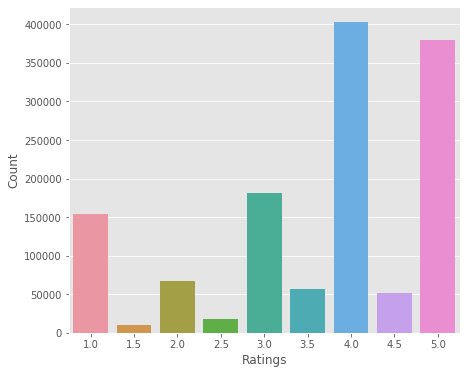

In [38]:
#Plotting Restaurant Rating Distribution

plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('Count')


In [39]:
print((rating_df.head()))


   rating                                             review  \
0     4.0  A beautiful place to dine inThe interiors take...   
1     4.0  I was here for dinner with my family on a week...   
2     2.0  Its a restaurant near to Banashankari BDA Me a...   
3     4.0  We went here on a weekend and one of us had th...   
4     5.0  The best thing about the place is its ambiance...   

                  Tag  
0  Jalsa-Banashankari  
1  Jalsa-Banashankari  
2  Jalsa-Banashankari  
3  Jalsa-Banashankari  
4  Jalsa-Banashankari  


In [40]:
from textblob import TextBlob
#rating_df['polarity'] = rating_df['review'].apply(lambda x: TextBlob(x).sentiment[0])
print(rating_df['rating'][0],TextBlob(rating_df['review'][0]).sentiment, rating_df['review'][0])

4.0 Sentiment(polarity=0.17232142857142857, subjectivity=0.5789682539682539) A beautiful place to dine inThe interiors take you back to the Mughal era The lightings are just perfectWe went there on the occasion of Christmas and so they had only limited items available But the taste and service was not compromised at allThe only complaint is that the breads could have been betterWould surely like to come here again


In [41]:
for i in range(0,5):
    print(TextBlob(rating_df['review'][i]).sentiment)


Sentiment(polarity=0.17232142857142857, subjectivity=0.5789682539682539)
Sentiment(polarity=0.5, subjectivity=0.5333333333333334)
Sentiment(polarity=0.1125, subjectivity=0.5625)
Sentiment(polarity=0.6416666666666667, subjectivity=0.6555555555555556)
Sentiment(polarity=0.485, subjectivity=0.3725)
